In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn import metrics
from math import sqrt
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
df = pd.read_csv('result.csv')

rows_drop = []
for index, row in df.iterrows():
    if row[2:].isnull().sum()/len(row[2:]) > 0.5:
        rows_drop.append(index)
df = df.drop(rows_drop, axis=0)

features = list(df.columns.values)
features.remove('region_name')
features.remove('date')
for feature in features:
    df[feature] = df[feature].fillna(df[feature].mean())
region = df.region_name.unique()
def split_region(i):
    val_state = (region[i],region[i+1])
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)


### Model split by region

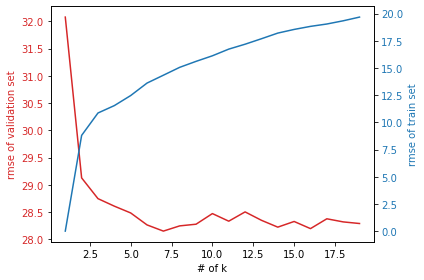

In [2]:
X = df.iloc[:,2:-1]
y = df.iloc[:,-1]
group = df.region_name.astype("category").cat.codes
group_kfold = GroupKFold(6)

rmse = np.empty(19)
rmse_train = np.empty(19)
for k in range(1,20):
    res = cross_validate(KNN(k), X, y, scoring='neg_root_mean_squared_error', groups=group, cv=group_kfold,return_train_score=True)
    rmse[k-1] = res['test_score'].mean() *(-1) 
    rmse_train[k-1] = res['train_score'].mean() *(-1)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('# of k')
ax1.set_ylabel('rmse of validation set', color=color)
ax1.plot(range(1,20),rmse, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('rmse of train set', color=color)
ax2.plot(range(1,20),rmse_train, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


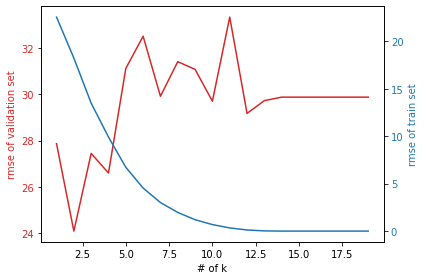

In [3]:
X = df.iloc[:,2:-1]
y = df.iloc[:,-1]
group = df.region_name.astype("category").cat.codes
group_kfold = GroupKFold(6)

rmse = np.empty(19)
rmse_train = np.empty(19)
for k in range(1,20):
    res = cross_validate(DTR(max_depth=k,random_state=10), X, y, scoring='neg_root_mean_squared_error', groups=group, cv=group_kfold, return_train_score=True)
    rmse[k-1] = res['test_score'].mean() *(-1) 
    rmse_train[k-1] = res['train_score'].mean() *(-1)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('# of k')
ax1.set_ylabel('rmse of validation set', color=color)
ax1.plot(range(1,20),rmse, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('rmse of train set', color=color) 
ax2.plot(range(1,20),rmse_train, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


### Models Split by Time

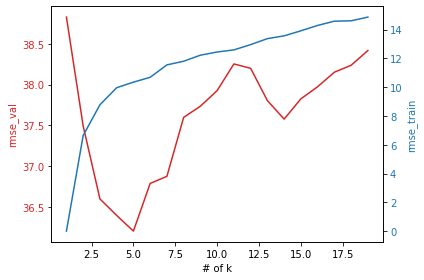

In [4]:
score_list = []
score_list_train = []
train = df.loc[df['date'] < '2020-08-10']
val = df.loc[df['date'] >= '2020-08-10']
for k in range(1,20):
    knn = KNN(k)
    knn.fit(train.iloc[:,2:-1],train.iloc[:,-1])
    y_pred = knn.predict(val.iloc[:,2:-1])
    y_train = knn.predict(train.iloc[:,2:-1])
    score_list.append(sqrt(metrics.mean_squared_error(val.iloc[:,-1],y_pred)))
    score_list_train.append(sqrt(metrics.mean_squared_error(train.iloc[:,-1],y_train)))
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('# of k')
ax1.set_ylabel('rmse_val', color=color)
ax1.plot(range(1,20),score_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('rmse_train', color=color) 
ax2.plot(range(1,20),score_list_train, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


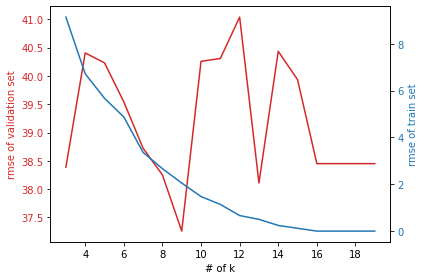

In [5]:
score_list = []
score_list_train = []
train = df.loc[df['date'] < '2020-08-10']
val = df.loc[df['date'] >= '2020-08-10']
for k in range(3,20):
    dtr = DTR(max_depth=k,random_state=10)
    dtr.fit(train.iloc[:,2:-1],train.iloc[:,-1])
    y_pred = dtr.predict(val.iloc[:,2:-1])
    y_train = dtr.predict(train.iloc[:,2:-1])
    score_list.append(sqrt(metrics.mean_squared_error(val.iloc[:,-1],y_pred)))
    score_list_train.append(sqrt(metrics.mean_squared_error(train.iloc[:,-1],y_train)))
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('# of k')
ax1.set_ylabel('rmse of validation set', color=color)
ax1.plot(range(3,20),score_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('rmse of train set', color=color) 
ax2.plot(range(3,20),score_list_train, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

### Model: Random Forest

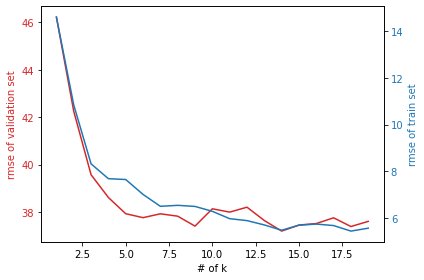

In [6]:
score_list = []
score_list_train = []
for k in range(1,20):
    rfr = RFR(k,random_state=10)
    rfr.fit(train.iloc[:,2:-1],train.iloc[:,-1])
    y_pred = rfr.predict(val.iloc[:,2:-1])
    y_train = rfr.predict(train.iloc[:,2:-1])
    score_list.append(sqrt(metrics.mean_squared_error(val.iloc[:,-1],y_pred)))
    score_list_train.append(sqrt(metrics.mean_squared_error(train.iloc[:,-1],y_train)))
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('# of k')
ax1.set_ylabel('rmse of validation set', color=color)
ax1.plot(range(1,20),score_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('rmse of train set', color=color)
ax2.plot(range(1,20),score_list_train, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

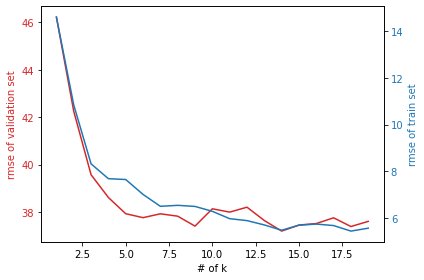

In [7]:
score_list = []
score_list_train = []
train = df.loc[df['date'] < '2020-08-10']
val = df.loc[df['date'] >= '2020-08-10']
for k in range(1,20):
    rfr = RFR(k,random_state=10)
    rfr.fit(train.iloc[:,2:-1],train.iloc[:,-1])
    y_pred = rfr.predict(val.iloc[:,2:-1])
    y_train = rfr.predict(train.iloc[:,2:-1])
    score_list.append(sqrt(metrics.mean_squared_error(val.iloc[:,-1],y_pred)))
    score_list_train.append(sqrt(metrics.mean_squared_error(train.iloc[:,-1],y_train)))
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('# of k')
ax1.set_ylabel('rmse of validation set', color=color)
ax1.plot(range(1,20),score_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('rmse of train set', color=color)
ax2.plot(range(1,20),score_list_train, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()